# Opportunity Project Use Case Assignment #1: Data Wrangling

# Data Wrangling Challenge

---------------------

## Problem Statement

U.S. Department of Education

Policy Priority: The Department of Education is focused on ensuring that parents, students, and policymakers are able to use its publicly available data to take meaningful action to improve outcomes. 

1. Supporting Decision-Making for Student Sub-populations and their Families
Problem: Certain mobile or disconnected student populations entering or reentering the community could greatly benefit from data and resources to support their wellbeing and success. Such students and families often lack information that is necessary to distinguish between their school options, access services, and identify affordable housing near high-quality school and in safe neighborhoods that have access to transit and employment. 

## Use Case

Maria is a 25-year-old US Army veteran, newly returned to the civilian workforce. She has recently completed a six-year commitment with the Army. During her time in the Army, she worked in supply management and logistics. She has decided to pursue a degree in Management Systems and Information Technology. 

Maria has asked you to use your skill with data to help her search for the best school for her. She is willing to relocate anywhere in the continental United States, but she has a few criteria that her ideal schools must satisfy: 1) safety (low crime), 2) urban -- Maria wants to live the big city life, and 3) start-ups -- the school should be in a metropolitan area that ranks highly in entrepreneurialism (she plans to find an internship at a startup while she studies). 

Maria would like you to help her narrow down her search to a list of schools that she can investigate more closely before making her decision.

## Your Task 

1. Produce a dataset of schools which satisfy all of Maria's criteria
2. Rank them from best to worst according to the same criteria.

Maria's schools must:

1. be in an urban/metropolitan area.
2. be in a city that ranks 75th percentile or higher on Kauffman's start-up rankings.
3. be below 50th percentile in overall crime.
4. offer a degree in Information Technology/Science.

All the data you need is provided with the exception of the entrepreneurial data, which can be accessed at [http://www.kauffman.org/microsites/kauffman-index/about/archive/kauffman-index-of-entrepreneurial-activity-data-files]() (Metro Area Components Data 2015)

Tips:
1. Read the data dictionaries or codebooks to figure out what the variables mean and which ones you will need to use.
2. Eliminate unneeded columns.
3. Look for suitable columns to join the tables on.
4. Perform any cleaning and standardization needed to facilitate the joins.
5. Engineer a summary variable for school crime so that we can compare schools by levels of crime overall.
6. Eliminate from the data all the data points that fail to satisfy Maria's criteria.
7. Engineer a method for ranking the schools in consideration of all of Maria's criteria taken together.

## Extra Credit

Maria doesn't like the cold. Find and integrate temperature data. Eliminate any schools located in cities/areas below the 25th percentile in average temperature.

--------------------------------

- *This was created as a training exercise in data wrangling/preparation.*
- *Prerequisites include scripting skills with Python Pandas or R (or another data manipulation tool) to perform data cleaning, transformations, joins, etc.*
- *No additional subject matter or data analysis knowledge is required.*
- *The task is a specific and hypothetical use case based on a problem statement proposed by the Department of Education in Opportunity Project documentation.*
- *The participant who completes the exercise will demonstrate the ability to clean, join, and organize data from disparate tables and formats in the process of solving a realistic problem.*

------------------------------------------------

------------------------------------------------------------------------------------------

This solution uses the Python [Pandas](http://pandas.pydata.org) API.

Check out this nice Pandas data wrangling [cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

First, download the data from https://data.world/nrippner/opportunity-project-use-case and put the files in a the directory you plan to use for this assignment.

Second, tell Python to set this as your current directory:

In [ ]:
# delete hash sign below and enter path inside the quotes
# %cd "../"

In [25]:
import pandas as pd
import numpy as np

In [26]:
# set a variable named "path" to your current directory
path = %pwd

# Step 1

## obtain, clean, prepare, and merge data

### College Scorecard Dataset
### Campus Safety Dataset

In [27]:
with open('%s\CollegeScorecard.csv' % path) as f:
    csdf = pd.read_csv(f)

with open('%s\\reportedcrime121314.csv' % path) as f:
    safedf = pd.read_csv(f)

print csdf.shape
print safedf.shape

(7804, 1729)
(11593, 44)


In [28]:
# rename columns to add prefixes to indicate source table
csdf_cols = {}
safedf_cols = {}

def new_names(data, dict, prefix):
    for i, j in enumerate(data.columns):
        dict[j] = prefix + j

new_names(csdf, csdf_cols, 'CS_')
new_names(safedf, safedf_cols, 'SA_')

csdf = csdf.rename(columns=csdf_cols)
safedf = safedf.rename(columns=safedf_cols)

print 'safedf: \n', safedf.columns[:20]
print '---------------------------------------------------------------------------------'
print 'csdf: \n', csdf.columns[:20]

safedf: 
Index([u'SA_UNITID_P', u'SA_INSTNM', u'SA_BRANCH', u'SA_Address', u'SA_City',
       u'SA_State', u'SA_ZIP', u'SA_sector_cd', u'SA_Sector_desc',
       u'SA_men_total', u'SA_women_total', u'SA_Total', u'SA_MURD12',
       u'SA_NEG_M12', u'SA_FORCIB12', u'SA_NONFOR12', u'SA_ROBBE12',
       u'SA_AGG_A12', u'SA_BURGLA12', u'SA_VEHIC12'],
      dtype='object')
---------------------------------------------------------------------------------
csdf: 
Index([u'CS_UNITID', u'CS_OPEID', u'CS_opeid6', u'CS_INSTNM', u'CS_CITY',
       u'CS_STABBR', u'CS_ZIP', u'CS_AccredAgency', u'CS_INSTURL',
       u'CS_NPCURL', u'CS_sch_deg', u'CS_HCM2', u'CS_main', u'CS_NUMBRANCH',
       u'CS_PREDDEG', u'CS_HIGHDEG', u'CS_CONTROL', u'CS_st_fips',
       u'CS_region', u'CS_LOCALE'],
      dtype='object')


In [29]:
# split the SA_UNITID variable to save the last 3 digits, just in case we need them
safedf['SA_CODE_PLUS'] = safedf.SA_UNITID_P.apply(lambda x: str(x)[-3:])
safedf['UNITID'] = safedf.SA_UNITID_P.apply(lambda x: str(x)[:6])

# check for duplicated
print sum(safedf.UNITID.duplicated())
print sum(csdf.CS_UNITID.duplicated())

4532
0


In [30]:
# move new features to left for easier viewing
a = safedf['SA_CODE_PLUS']
b = safedf['UNITID']
safedf.drop(['SA_CODE_PLUS', 'UNITID'], axis=1, inplace=True)
safedf.insert(0, 'UNITID', b)
safedf.insert(1, 'SA_CODE_PLUS', a)

#take a closer look at duplicates in safedf
safedf.iloc[10:20,:15]   
#look like we can drop duplicates as the data seems to be the same across duplicates
# In other words, let's consolidate, for example, all the variations of Auburn University
# Into a single data point for Auburn University. We can do this by looking at the last 3 digits
# of SA_UNITID_P

,UNITID,SA_CODE_PLUS,SA_UNITID_P,SA_INSTNM,SA_BRANCH,SA_Address,SA_City,SA_State,SA_ZIP,SA_sector_cd,SA_Sector_desc,SA_men_total,SA_women_total,SA_Total,SA_MURD12
10,100760,003,100760003,Central Alabama Community College,Talladega Campus,1009 South Street East,Talladega,AL,35160,4,"Public, 2-year",701.0,1025.0,1726.0,NaN
11,100812,001,100812001,Athens State University,Athens State University Main Campus,300 N BEATY ST,ATHENS,AL,35611,1,"Public, 4-year or above",1082.0,2046.0,3128.0,NaN
12,100830,001,100830001,Auburn University at Montgomery,Auburn University Montgomery,7400 EAST DRIVE,MONTGOMERY,AL,361173596,1,"Public, 4-year or above",1824.0,3233.0,5057.0,NaN
13,100858,001,100858001,Auburn University,Main Campus,107 Samford Hall,Auburn,AL,36849,1,"Public, 4-year or above",13114.0,12798.0,25912.0,NaN
14,100858,002,100858002,Auburn University,Joseph S Bruno Auburn Abroad Italy,Via del Parco 149,Ariccia,NaN,00040,1,"Public, 4-year or above",13114.0,12798.0,25912.0,NaN
15,100858,003,100858003,Auburn University,Solon Dixon Forestry Education Center,12130 Dixon Center Road,Andalusia,AL,36420,1,"Public, 4-year or above",13114.0,12798.0,25912.0,NaN
16,100858,004,100858004,Auburn University,Rural Studio,8448 AL Hwy 61,Newbern,AL,36765,1,"Public, 4-year or above",13114.0,12798.0,25912.0,NaN
17,100858,005,100858005,Auburn University,Harris Early Learning Center,1413 7th Avenue North,Birmingham,AL,35206,1,"Public, 4-year or above",13114.0,12798.0,25912.0,NaN
18,100858,006,100858006,Auburn University,Auburn University Regional Airport,2154 Mike Hubbard Blvd,Auburn,AL,36830,1,"Public, 4-year or above",13114.0,12798.0,25912.0,NaN
19,100858,007,100858007,Auburn University,E W Shell Fisheries Center North,2101 North College Street,Auburn,AL,36830,1,"Public, 4-year or above",13114.0,12798.0,25912.0,NaN


In [31]:
print 'length of safedf: ',len(safedf)
# retain only UNITID ending in '001'
safedf['SA_UNITID_P'] = safedf.SA_UNITID_P.apply(lambda x: str(x)).astype(np.object_)
safedf = safedf[safedf.SA_UNITID_P.str.endswith('001')]
print 'new length of safedf: ',len(safedf)
print 'length of csdf: ', len(csdf)
print '# duplicates in safedf: ', sum(safedf.UNITID.duplicated())
print '# duplicates in csdf: ', sum(csdf.CS_UNITID.duplicated())

length of safedf:  11593
new length of safedf:  7032
length of csdf:  7804
# duplicates in safedf:  0
# duplicates in csdf:  0


#### Standardizing Variables
Now, in order to merge the College safety (safedf) and College Scorecard (csdf) dataframes, we have to: 
1. pick a column to merge on (city)
2. make sure that that the city columns match (eg, 'atlanta' in safedf must be the exactly same spelling and format as 'atlanta' in csdf).

*note* this can be time consuming and usually can't be completely automated. But, we demonstrate some Python techniques to make the process manageable.

In [32]:
# Let's see how many UNITIDs already match
csdf['UNITID'] = csdf.CS_UNITID.apply(lambda x: str(x)).astype(np.object_)
nope = [(i, j) for (i, j) in enumerate(safedf.UNITID.isin(csdf.UNITID)) if not j]
print '# of matches: ',len(safedf) - len(nope)
print '# of non-matches', len(nope)
print '** elements of safedf that don\'t match with csdf: \n', nope

# of matches:  6900
# of non-matches 132
** elements of safedf that don't match with csdf: 
[(320, False), (384, False), (463, False), (768, False), (999, False), (1169, False), (1171, False), (1172, False), (1173, False), (1341, False), (2086, False), (2172, False), (2421, False), (2724, False), (4487, False), (4503, False), (4679, False), (4764, False), (4825, False), (4989, False), (5208, False), (5262, False), (5634, False), (5823, False), (6309, False), (6392, False), (6582, False), (6643, False), (6746, False), (6766, False), (6775, False), (6798, False), (6868, False), (6925, False), (6928, False), (6931, False), (6936, False), (6937, False), (6938, False), (6939, False), (6940, False), (6941, False), (6942, False), (6943, False), (6944, False), (6945, False), (6946, False), (6947, False), (6948, False), (6949, False), (6950, False), (6951, False), (6952, False), (6953, False), (6954, False), (6955, False), (6956, False), (6957, False), (6958, False), (6959, False), (6960, False

*note*: we can drop these 132 non-matching UNITIDs because they're valid non-matches rather than spelling or formatting inconsistencies. In other words, 132 schools in the campus safety data are not included in the College Scorecard data

In [33]:
# let's join the DataFrames on UNITID
print 'safedf shape: ', safedf.shape
print 'csdf shape: ', csdf.shape
mdf = pd.merge(safedf, csdf, how='right', on='UNITID')
print 'mdf shape: ', mdf.shape

safedf shape:  (7032, 46)
csdf shape:  (7804, 1730)
mdf shape:  (7804, 1775)


In [34]:
# save to csv
#mdf.to_csv('mdf.csv', index=False)

## Kauffman Start up index data

In [35]:
# Let's obtain the start up index rankings 
# from http://www.kauffman.org/microsites/kauffman-index/about/archive/kauffman-index-of-entrepreneurial-activity-data-files
# metrocomponentsksia2015.xls --> metro_2015_kauffman.csv
with open('metro_2015_kauffman.csv') as f:
    sudf = pd.read_csv(f)

# Now, let's figure out how to merge the Kauffman data with our college data
# first, let's move the 'city variables' to the 'left' for easy viewing
a = mdf.pop('SA_City')
b = mdf.pop('CS_CITY')
mdf.insert(0, 'SA_City', a)
mdf.insert(1, 'CS_City', b)

In [36]:
# rename sudf columns
sudf_cols = {}
for i, j in enumerate(sudf.columns):
    sudf_cols[j] = 'KAU_' + j
    
sudf = sudf.rename(columns=sudf_cols)
sudf.head()

,KAU_Metro Area Code,KAU_Metro Area Name,KAU_Metro Area Main City,KAU_Metro Area States,KAU_Rank 2015,KAU_Rank 2014,KAU_Z-Score 2015,KAU_Z-Score 2014
0,12060,Atlanta-Sandy Springs-Marietta,Atlanta,Georgia,13,18,-0.149070,-0.856135
1,12420,Austin-Round Rock-San Marcos,Austin,Texas,1,2,4.288039,4.347403
2,12580,Baltimore-Towson,Baltimore,Maryland,17,19,-0.800236,-0.906375
3,14460,Boston-Cambridge-Quincy,Boston,Massachusetts-New Hampshire,22,31,-1.168361,-2.270829
4,16740,Charlotte-Gastonia-Rock Hill,Charlotte,North Carolina-South Carolina,25,28,-1.631065,-1.958215


In [37]:
# take a look at first 10 rows, first 10 columns of mdf
mdf.iloc[:10,:10]

,SA_City,CS_City,UNITID,SA_CODE_PLUS,SA_UNITID_P,SA_INSTNM,SA_BRANCH,SA_Address,SA_State,SA_ZIP
0,NORMAL,Normal,100654,001,100654001,Alabama A & M University,Main Campus,4900 MERIDIAN ST,AL,35762
1,BIRMINGHAM,Birmingham,100663,001,100663001,University of Alabama at Birmingham,Main Campus,"ADMINISTRATION BLDG SUITE 1070, 701 20th Stree...",AL,352940110
2,MONTGOMERY,Montgomery,100690,001,100690001,Amridge University,Main Campus,1200 TAYLOR RD,AL,361173553
3,HUNTSVILLE,Huntsville,100706,001,100706001,University of Alabama in Huntsville,Main Campus,301 SPARKMAN DR,AL,35899
4,MONTGOMERY,Montgomery,100724,001,100724001,Alabama State University,Main Campus,915 SOUTH JACKSON ST,AL,361040271
5,TUSCALOOSA,Tuscaloosa,100751,001,100751001,The University of Alabama,Main Campus,1110 Jackson Ave,AL,354870180
6,Alexander City,Alexander City,100760,001,100760001,Central Alabama Community College,Alexander City Campus,1675 Cherokee Rd,AL,35010
7,ATHENS,Athens,100812,001,100812001,Athens State University,Athens State University Main Campus,300 N BEATY ST,AL,35611
8,MONTGOMERY,Montgomery,100830,001,100830001,Auburn University at Montgomery,Auburn University Montgomery,7400 EAST DRIVE,AL,361173596
9,Auburn,Auburn University,100858,001,100858001,Auburn University,Main Campus,107 Samford Hall,AL,36849


In [38]:
# let's merge on SA_City (mdf) and 'Metro Area Main City' (sudf)
# first, give the columns a shared name and convert them to lower casee
sudf = sudf.rename(columns={sudf.columns[2]:'City'})
mdf = mdf.rename(columns={'SA_City':'City'})
sudf.loc[:,'City'] = sudf.City.str.lower()
mdf.loc[:,'City'] = mdf.City.str.lower()
mdf['City'] = mdf.City.fillna('')

# let's see how many of the City names match between the DataFrames
# Here, we're using list comprehension with a for loop, the 'enumerate' 
# built in function, and the Pandas/numpy Series object 'isin' method.
nope = [(i, j) for (i, j) in enumerate(sudf.City.isin(mdf.City)) if not j]
print '# matches: ',len(sudf) - len(nope)
print '# not matches: ', len(nope)
print '** elements of sudf that don\'t match with mdf: \n', nope

# matches:  30
# not matches:  10
** elements of sudf that don't match with mdf: 
[(15, False), (16, False), (17, False), (22, False), (31, False), (32, False), (33, False), (34, False), (36, False), (38, False)]


In [39]:
# Let's fix the 10 non-matches
# use this function to find indexes of non-matches in both dataframes
def check(index):
    sc = sudf.loc[index,'City']   
    print 'sudf:', sc
    keyword = raw_input("enter search word:     ")
    print keyword
    x = [i for i, j in enumerate(mdf.City.str.contains(keyword)) if j]
    print "number of matches:  ",  len(x)
    print 'mdf city:', mdf.City[x]

In [40]:
#check(15)

In [41]:
sudf_repl = \
{ 'City' :
                { sudf.City[15]:mdf.City[1315],
                  sudf.City[16]:mdf.City[2140],
                  sudf.City[17]:mdf.City[214],
                  sudf.City[22]:mdf.City[2304],
                  sudf.City[31]:mdf.City[3612],
                  sudf.City[32]:mdf.City[225],
                  sudf.City[33]:mdf.City[201],
                  sudf.City[34]:mdf.City[282],
                  sudf.City[36]:mdf.City[1964],
                  sudf.City[38]:mdf.City[3818] }
}

sudf = sudf.replace(sudf_repl)

In [42]:
# Let's check matches again
nope = [(i, j) for (i, j) in enumerate(sudf.City.isin(mdf.City)) if not j]
print '# matches: ',len(sudf) - len(nope)
print '# not matches: ', len(nope)
print '** elements of safedf that don\'t match with csdf: \n', nope

# matches:  40
# not matches:  0
** elements of safedf that don't match with csdf: 
[]


In [43]:
# now we can join sudf and mdf on 'City'
print 'shape mdf:', mdf.shape
print 'shape sudf:', sudf.shape
fulldf = pd.merge(mdf, sudf, how='left', on='City')
print 'shape fulldf:', fulldf.shape

shape mdf: (7804, 1775)
shape sudf: (40, 8)
shape fulldf: (7804, 1782)


## FBI Crime Dataset

*Note*: Inspection of the campus safety dataset (safedf) reveals that that data is too sparse -- too few universities and colleges are represented in the data, presumably because they didn't complete the survey used for data collection for whatever reason. So, as is often the case, deeper inspection of the data reveals that we need to change course.

Let's instead include data from the FBI. This will require that we merge the FBI dataset and we will be using data reported by municipalities rather than campuses.

In [44]:
# closer inspection reveals that our original Campus Safety data 
# from data.gov is much too sparse. 
# 
# Let's add data from the FBI instead
with open('LocalCrime.csv') as f:
    crimedf = pd.read_csv(f)

# rename columns
crime_cols = {}
for i in range(0,8):
    crime_cols[crimedf.columns[i]] = 'FBI_' + crimedf.columns[i]

crimedf = crimedf.rename(columns = crime_cols)
  
crimedf.head()

,FBI_Agency,FBI_State,FBI_2007,FBI_2008,FBI_2009,FBI_2010,FBI_2011,FBI_2012,Unnamed: 8
0,Birmingham Police Dept,AL,3320.0,3249.0,2812.0,NaN,3163.0,3237.0,
1,Huntsville Police Dept,AL,1379.0,1222.0,1164.0,1182.0,1518.0,1696.0,
2,Mobile Police Dept,AL,1144.0,1204.0,1994.0,1702.0,1619.0,1314.0,
3,Montgomery Police Dept,AL,1157.0,883.0,871.0,797.0,707.0,827.0,
4,Anchorage Police Dept,AK,2405.0,2647.0,2488.0,2432.0,2388.0,2479.0,


In [45]:
# drop extra column
crimedf = crimedf.drop([crimedf.columns[-1]], axis=1)

# fill missing values with empty string     
crimedf['FBI_Agency'] = crimedf.FBI_Agency.fillna('')

# transform to lowercase
crimedf['FBI_Agency'] = crimedf.FBI_Agency.str.lower()

# let's try to extract city names so we can join on city variable
stops = ['dept','of','city', 'bureau', 'police', '(', ')', 'county',
         'department', 'metropolitan', 'metro','public', 'safety']

# remove unwanted words, keeping only city names
def remove(x):
    for word in stops:
        x = x.replace(word, '')
    return x
crimedf['City'] = crimedf.FBI_Agency.apply(remove)

# transform to all lower-case
crimedf['City'] = crimedf.City.str.lower()

# change to 'object' pandas/numpy dtype
crimedf['City'] = crimedf.City.astype('object')

# strip whitespace
crimedf['City'] = crimedf.City.str.strip()

crimedf.head()

,FBI_Agency,FBI_State,FBI_2007,FBI_2008,FBI_2009,FBI_2010,FBI_2011,FBI_2012,City
0,birmingham police dept,AL,3320.0,3249.0,2812.0,NaN,3163.0,3237.0,birmingham
1,huntsville police dept,AL,1379.0,1222.0,1164.0,1182.0,1518.0,1696.0,huntsville
2,mobile police dept,AL,1144.0,1204.0,1994.0,1702.0,1619.0,1314.0,mobile
3,montgomery police dept,AL,1157.0,883.0,871.0,797.0,707.0,827.0,montgomery
4,anchorage police dept,AK,2405.0,2647.0,2488.0,2432.0,2388.0,2479.0,anchorage


In [46]:
# let's see how many of the City names match between the DataFrames
fulldf['City'] = fulldf.City.fillna('')
nope = [(i, j) for (i, j) in enumerate(crimedf.City.isin(fulldf.City)) if not j]
print '# matches: ',len(crimedf) - len(nope)
print '# not matches: ', len(nope)
print 'crimedf unique cities:', len(crimedf.City.unique())
print 'fulldf unique cities:', len(fulldf.City.unique())

# matches:  266
# not matches:  23
crimedf unique cities: 278
fulldf unique cities: 2448


In [47]:
print 'Cities in crimedf that don\'t match with fulldf:'
for i,j in enumerate(nope):
    print j[0], ':', crimedf.City[j[0]]

Cities in crimedf that don't match with fulldf:
6 : gilbert
12 : surprise
21 : carslbad
23 : murrieta
27 : daly
54 : palmdale
58 : rialto
73 : simi valley
102 : port st lucie
104 : coral springs
113 : palm bay
120 : athens-clarke
147 : lexington-fayette
167 : st. paul
182 : edison twp
184 : jersey
189 : amherst town
196 : charlotte-mecklenburg
213 : oklahoma
233 : nashville-davidson
247 : frisco
269 : salt lake
271 : west valley


In [48]:
# Let's see if we can fix these to make them match
# use this function to find indexes of non-matches in both dataframes
def check(index):
    sc = crimedf.loc[index,'City']   
    print 'crimedf:', sc
    keyword = raw_input("enter search word:     ")
    print keyword
    x = [i for i, j in enumerate(fulldf.City.str.contains(keyword)) if j]
    print "number of matches:  ",  len(x)
    print 'fulldf city:', fulldf.City[x]

In [49]:
#check(271)

In [50]:
#[crimedf.City[i] for i,j  in enumerate(crimedf.City.str.contains('charlotte')) if j]

In [51]:
crimedf_repl = \
{ 'City' :
                { crimedf.City[3]:fulldf.City[456],
                  crimedf.City[27]:fulldf.City[338],
                  crimedf.City[120]:fulldf.City[883],
                  crimedf.City[147]:fulldf.City[2007],
                  crimedf.City[167]:fulldf.City[1846],
                  crimedf.City[182]:fulldf.City[2227],
                  crimedf.City[184]:fulldf.City[2220],
                  crimedf.City[189]:fulldf.City[1593],
                  crimedf.City[196]:fulldf.City[6880],
                  crimedf.City[213]:fulldf.City[2971],
                  crimedf.City[233]:fulldf.City[6798],
                  crimedf.City[269]:fulldf.City[6520]}
}

crimedf = crimedf.replace(crimedf_repl)

In [52]:
# Let's check matches again
nope = [(i, j) for (i, j) in enumerate(crimedf.City.isin(fulldf.City)) if not j]
print '# matches: ',len(crimedf.City) - len(nope)
print '# not matches: ', len(nope)
print '** elements of crimedf.City that don\'t match with fulldf.City: \n', nope

# matches:  277
# not matches:  12
** elements of crimedf.City that don't match with fulldf.City: 
[(6, False), (12, False), (21, False), (23, False), (54, False), (58, False), (73, False), (102, False), (104, False), (113, False), (247, False), (271, False)]


*note*: there are 12 cities remaining that cannot be matched.

In [53]:
# Let's merge on City
print 'fulldf shape: ', fulldf.shape
fulldf = pd.merge(fulldf, crimedf, how='inner', on='City')
print 'crimedf shape:', crimedf.shape
print 'fulldf shape: ', fulldf.shape

fulldf shape:  (7804, 1782)
crimedf shape: (289, 9)
fulldf shape:  (3107, 1790)


After merging the crime data from the FBI (crimedf) by city,
we're down to 3107 schools, in 289 cities.

In [54]:
# save to csv
#fulldf.to_csv('fulldf.csv')

Now we have our full data with our three original data tables
(college scorecard, FBI crime by city, and Kauffman start up index)
all merged into a single DataFrame
Now, we can work to extract the information we're after

# Step 2

## Your Task 

1. Produce a dataset of schools which satisfy all of Maria's criteria
2. Rank them from best to worst according to the same criteria.

Maria's schools must:

1. be in an urban/metropolitan area.
2. be in a city that ranks 75th percentile or higher on Kauffman's start-up rankings.
3. be below 50th percentile in overall crime.
4. offer a degree in Information Technology/Science.

In [55]:
# we have a dataframe with 1790 columns and 3107 rows
# let's extract just the data we need to reach our goal
# first, we need to explore the data and documentation 
# CollegeScorecardDataDictionary-09-12-2015.csv & Reportedcrime121314_Doc.doc

# let's start with narrowing the data down to schools in metropolitan areas
with open('CollegeScorecardDataDictionary-09-12-2015.csv') as f:
    datadict = pd.read_csv(f)


*Note*: at this point it's necessary to manually look through
the data dictionaries and documentation. This is a time when we need to learn about the subject matter contained in the datasets. 

In [57]:
# it looks like the variable we're after is 'locale'
# perform a boolean indexing to extract just those rows 
# where the 'VARIABLE NAME' is 'LOCALE'
datadict[datadict['VARIABLE NAME'] == 'LOCALE']

,NAME OF DATA ELEMENT,Year,dev-category,developer-friendly name,VARIABLE NAME,API data type,label,VALUE,LABEL,SCORECARD? Y/N,SOURCE,NOTES
95,Locale of institution,NaN,school,locale,LOCALE,integer,NaN,11,"City: Large (population of 250,000 or more)",NaN,IPEDS,NaN


In [58]:
# take a closer look
datadict[95:108][['NAME OF DATA ELEMENT','VALUE','LABEL', 'VARIABLE NAME']]

,NAME OF DATA ELEMENT,VALUE,LABEL,VARIABLE NAME
95,Locale of institution,11,"City: Large (population of 250,000 or more)",LOCALE
96,NaN,12,"City: Midsize (population of at least 100,000 ...",NaN
97,NaN,13,"City: Small (population less than 100,000)",NaN
98,NaN,21,"Suburb: Large (outside principal city, in urba...",NaN
99,NaN,22,"Suburb: Midsize (outside principal city, in ur...",NaN
100,NaN,23,"Suburb: Small (outside principal city, in urba...",NaN
101,NaN,31,Town: Fringe (in urban cluster up to 10 miles ...,NaN
102,NaN,32,Town: Distant (in urban cluster more than 10 m...,NaN
103,NaN,33,Town: Remote (in urban cluster more than 35 mi...,NaN
104,NaN,41,Rural: Fringe (rural territory up to 5 miles f...,NaN


In [59]:
# looks like rows 95 - 106 are for 'VARIABLE NAME' equal 'LOCALE'
# OK. This looks to me like we're only interested in schools where the 
# 'Locale of insition' variable is 11 or 12 (bigger cities)
# note: recall that we added 'CS_' prefix earlier
print 'fulldf shape:', fulldf.shape
print 'unique fulldf LOCALE:', fulldf.CS_LOCALE.value_counts()
# Let's use boolean indexing ( the pipe symbol represents 'or')
fulldf = fulldf[(fulldf.CS_LOCALE == 11) | (fulldf.CS_LOCALE == 12)]
print 'fulldf shape:', fulldf.shape
print 'unique fulldf LOCALE:', fulldf.CS_LOCALE.value_counts()

fulldf shape: (3107, 1790)
unique fulldf LOCALE: 11.0    1408
12.0     878
21.0     548
13.0      99
32.0      49
41.0      46
22.0      34
33.0      16
23.0      14
42.0       8
31.0       6
43.0       1
Name: CS_LOCALE, dtype: int64
fulldf shape: (2286, 1790)
unique fulldf LOCALE: 11.0    1408
12.0     878
Name: CS_LOCALE, dtype: int64


In [60]:
# After extracting only the rows where the 'LOCALE' variable is 11 or 12,
# we're down to a dataframe of shape (2286,1790)
# Now let's reduce our data to only schools in cities that rank above 75th
# percentile on Kauffman's startup index
# let's investigate by looking back at the original Kauffman data (sudf)
sudf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
KAU_Metro Area Code      40 non-null int64
KAU_Metro Area Name      40 non-null object
City                     40 non-null object
KAU_Metro Area States    40 non-null object
KAU_Rank 2015            40 non-null int64
KAU_Rank 2014            40 non-null int64
KAU_Z-Score 2015         40 non-null float64
KAU_Z-Score 2014         40 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 2.6+ KB


In [61]:
# we can work with 'Rank 2015'
# let's start by changing the name for convenience
fulldf = fulldf.rename(columns={'KAU_Rank 2015':'KAU_Rank2015'})

In [62]:
# Remove any schools in cities that are not on Kauffman's list
print 'number of cities to remove: ', sum(fulldf.KAU_Rank2015.isnull())
print 'cities to keep:', sum(fulldf.KAU_Rank2015.notnull())
fulldf.loc[:,'Rank2015'] = fulldf.KAU_Rank2015.fillna(-9999)
fulldf = fulldf[fulldf.KAU_Rank2015 > 0]
print 'fulldf shape:', fulldf.shape

number of cities to remove:  1299
cities to keep: 987
fulldf shape: (987, 1791)


After removing rows with missing values in Kauffman's 2015 rankings, 
We're down to 987 rows.

In [63]:
# let's create a new variable based on KAU_Rank2015 percentiles
# This will allow us to filter schools in the the top 25 percentiles
from scipy.stats import percentileofscore
fulldf['PercentileRank'] = [percentileofscore(fulldf.KAU_Rank2015, i, 'rank') for i in fulldf.Rank2015]

In [64]:
fulldf.PercentileRank.describe()

count    987.000000
mean      50.050659
std       28.852340
min        1.418440
25%       25.177305
50%       50.253293
75%       74.265451
max       98.834853
Name: PercentileRank, dtype: float64

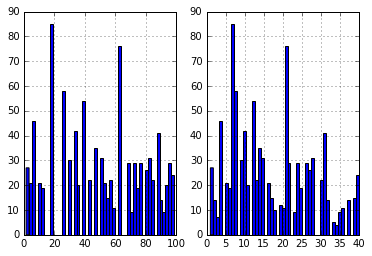

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2)
fulldf.PercentileRank.hist(ax=ax1, bins=50)
fulldf.KAU_Rank2015.hist(ax=ax2, bins=50)

In [66]:
# now, let's remove all schools below 75th percentile
fulldf = fulldf[fulldf.PercentileRank < 25]
print 'shape fulldf:', fulldf.shape
# this reduces the dataset down to 219 schools

shape fulldf: (219, 1792)


In [67]:
fulldf.City.value_counts()

new york         85
los angeles      46
austin           27
denver           21
san francisco    19
miami            14
san jose          7
Name: City, dtype: int64

After filtering for Maria's criteria for metropolitan areas in high in startups,
we're down to the seven cities listed above

In [68]:
# next, let's narrow down to only school with degrees in Information Technology
datadict.info()
#datadict.str.contains('information')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 12 columns):
NAME OF DATA ELEMENT       1720 non-null object
Year                       253 non-null object
dev-category               1848 non-null object
developer-friendly name    1117 non-null object
VARIABLE NAME              1720 non-null object
API data type              1720 non-null object
label                      38 non-null object
VALUE                      289 non-null object
LABEL                      297 non-null object
SCORECARD? Y/N             63 non-null object
SOURCE                     1720 non-null object
NOTES                      44 non-null object
dtypes: object(12)
memory usage: 183.2+ KB


In [69]:
# Here you need to manually explore the data dictionary again to learn which  
# variables represent the information you want.
# seems like we can narrow down to schools awarding degrees in these 2 variables:
datadict[(datadict['VARIABLE NAME'] == 'PCIP52') | (datadict['VARIABLE NAME'] == 'PCIP11')]

,NAME OF DATA ELEMENT,Year,dev-category,developer-friendly name,VARIABLE NAME,API data type,label,VALUE,LABEL,SCORECARD? Y/N,SOURCE,NOTES
297,Percentage of degrees awarded in Computer And ...,NaN,academics,program_percentage.computer,PCIP11,float,Computer and Information Sciences and Support ...,NaN,Computer and Information Sciences and Support ...,NaN,IPEDS,NaN
327,"Percentage of degrees awarded in Business, Man...",NaN,academics,program_percentage.business_marketing,PCIP52,float,"Business, Management, Marketing, and Related S...",NaN,"Business, Management, Marketing, and Related S...",NaN,IPEDS,NaN


In [70]:
print 'fulldf shape:', fulldf.shape
fulldf = fulldf[(fulldf.CS_PCIP11 > 0) | (fulldf.CS_PCIP52 > 0)]
print 'fulldf shape:', fulldf.shape
# now we're down to 88 schools

fulldf shape: (219, 1792)
fulldf shape: (88, 1792)


Next, let's remove the schools in the cities with the highest crime

In [71]:
# This list comprehension command with search through all the 1792 columns in fulldf
# and return a list of those that start with FBI_
fbi_cols = [fulldf.columns[i] for i, j in enumerate(fulldf.columns.str.startswith('FBI_')) if j]
fbi_cols

['FBI_Agency',
 'FBI_State',
 'FBI_2007',
 'FBI_2008',
 'FBI_2009',
 'FBI_2010',
 'FBI_2011',
 'FBI_2012']

In [72]:
# Let's use the FBI_2012 data because it's the most recent.
# Let's find percentile ranks (and keep the safest 50%
# of the remaining 7 cities. (This is an arbitrary decision --
# we also could take the safest cities prior to filtering on
# the other criteria. But, it seems a reasonable compromise
# to go about it this way.
fulldf['FBI_percentile'] = [percentileofscore(fulldf.FBI_2012, i, 'rank') for i in fulldf.FBI_2012]
fulldf = fulldf[fulldf.FBI_percentile <= 50]
print fulldf.shape
print fulldf.City.value_counts()

(44, 1793)
denver           12
austin           12
san francisco     7
miami             7
san jose          6
Name: City, dtype: int64


OK!! Now we've met all of Maria's criteria.
-- We have 44 schools from relatively safe, metropolitan areas that
are high on Kauffman's startup index and offer degrees in IT

-- Finally, let's create a ranking. Let's just add the Kauffman
rank and the crime rating. Schools with the lowest score will be 
ranked higher.

In [79]:
fulldf['FinalRank'] = fulldf.KAU_Rank2015 + (fulldf.FBI_percentile * 0.01)
fulldf['FinalRank'] = fulldf.FinalRank.astype(int)

In [80]:
fulldf[['FinalRank', 'City', 'CS_INSTNM']].sort_values(by='FinalRank')

,FinalRank,City,CS_INSTNM
2181,1,austin,CyberTex Institute of Technology
2159,1,austin,Huston-Tillotson University
2160,1,austin,Southern Careers Institute-Austin
2158,1,austin,Concordia University-Texas
2161,1,austin,Saint Edward's University
2179,1,austin,Strayer University-Texas
2165,1,austin,ITT Technical Institute-Austin
2170,1,austin,Virginia College-Austin
2174,1,austin,The Art Institute of Austin
2175,1,austin,National American University-Austin


## We did it!!

Maria now has a list of schools that she can use to narrow down the search for the perfect place for her to get her degree!! Hooray for data wrangling!